In [30]:
import rasterio
from matplotlib import pyplot
filepath = 'https://dds.cr.usgs.gov/srtm/version1/Islands/S46E168.hgt.zip'
raster = rasterio.open(filepath, 'r')

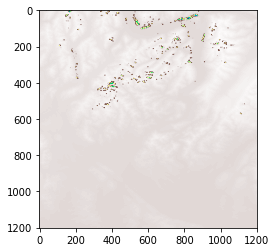

In [31]:
pyplot.imshow(raster.read(1), cmap='terrain')
pyplot.show()

In [19]:
print("Raster width is ", raster.width, " and height is ", raster.height)

Raster width is  1201  and height is  1201


In [25]:
print("The upper left corner is at long/lat", raster.transform * (0, 0) )
print("The lower right corner is at long/lat", raster.transform * (raster.width, raster.height))

The upper left corner is at long/lat (166.99958333333333, -44.999583333333334)
The lower right corner is at long/lat (168.00041666666667, -46.000416666666666)


In [33]:
raster.bounds

BoundingBox(left=167.99958333333333, bottom=-46.000416666666666, right=169.00041666666667, top=-44.999583333333334)

In [21]:
raster.crs

CRS.from_epsg(4326)

In [22]:
raster.read(1)

array([[ 398,  388,  382, ...,  983,  999, 1014],
       [ 401,  387,  379, ...,  955,  976,  992],
       [ 395,  384,  375, ...,  934,  952,  969],
       ...,
       [ 149,  142,  137, ...,  164,  163,  162],
       [ 165,  150,  145, ...,  159,  160,  160],
       [ 171,  158,  158, ...,  153,  151,  153]], dtype=int16)

In [8]:
raster.profile

{'driver': 'SRTMHGT', 'dtype': 'int16', 'nodata': -32768.0, 'width': 1201, 'height': 1201, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0008333333333333334, 0.0, 166.99958333333333,
       0.0, -0.0008333333333333334, -44.999583333333334), 'tiled': False}

'viridis', 'plasma', 'inferno', 'magma', 'cividis'

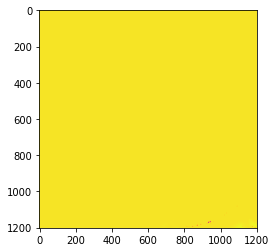

In [9]:
pyplot.imshow(raster.read(1), cmap='plasma')
pyplot.show()

In [38]:
show((raster, 1), cmap='Greys_r', interpolation='none', ax=ax)

show((raster, 1), contour=True, ax=ax)

pyplot.show()

NameError: name 'ax' is not defined

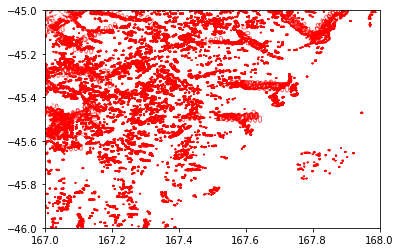

In [40]:
show((raster, 1), contour=True)

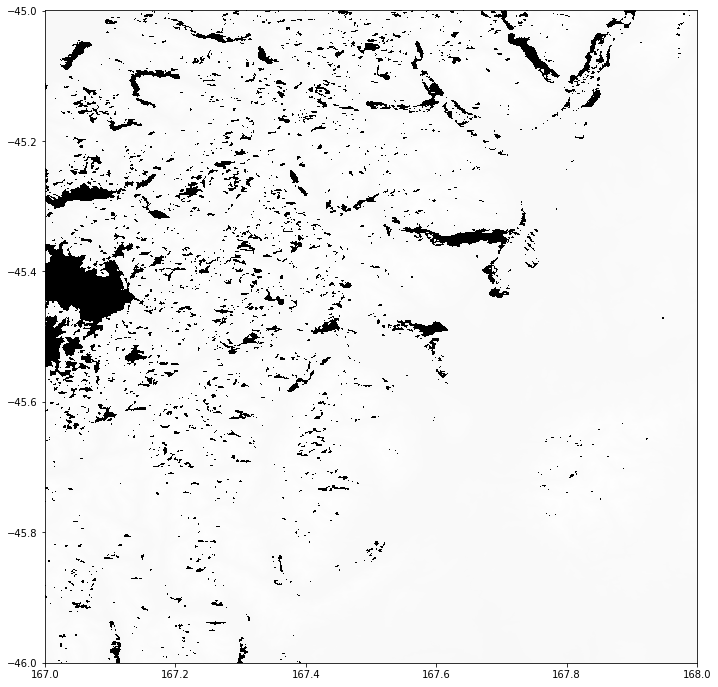

In [45]:
import matplotlib
fig, ax = matplotlib.pyplot.subplots(1, figsize=(12, 12))
show((raster, 1), cmap='Greys_r', interpolation='none', ax=ax)

In [ ]:
import ipyleaflet
import json
import pandas as pd
import os
import requests
from ipywidgets import link, FloatSlider
from branca.colormap import linear

def load_data(url, filename, file_type):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.content.decode("utf-8"))
    with open(filename, 'r') as f:
        return file_type(f)

geo_json_data = load_data(
    'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/us-states.json',
    'us-states.json',
     json.load)

In [ ]:
geo_json_data

In [ ]:
unemployment = load_data(
    'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/US_Unemployment_Oct2012.csv',
    'US_Unemployment_Oct2012.csv',
     pd.read_csv)
unemployment

In [ ]:
unemployment =  dict(zip(unemployment['State'].tolist(), unemployment['Unemployment'].tolist()))
unemployment

In [ ]:
layer = ipyleaflet.Choropleth(
    geo_data=geo_json_data,
    choro_data=unemployment,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 0.8, 'dashArray': '5, 5'})

m = ipyleaflet.Map(center = (43,-100), zoom = 4)
m.add_layer(layer)
m